# **Spotify Song Genre Prediction**
#### **DSCI 100 Section 007**
#### **Group 5 Project Proposal**

Dataset available at: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

Feature Descriptions: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

**Please Run This Before Continuing!!!!!**

In [23]:
set.seed(1738)

In [35]:
song_data <- read_csv("https://github.com/aidanmeharg/dsci-100-2022W2-group-5/raw/main/data/SpotifyFeatures.csv")

song_data

Rows: 232725 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): genre, artist_name, track_name, track_id, key, mode, time_signature
dbl (11): popularity, acousticness, danceability, duration_ms, energy, instr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.9010,0.517,166960,0.419,0.00e+00,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.2620,0.745,222442,0.704,0.00e+00,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.0973,0.758,323027,0.470,4.89e-05,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


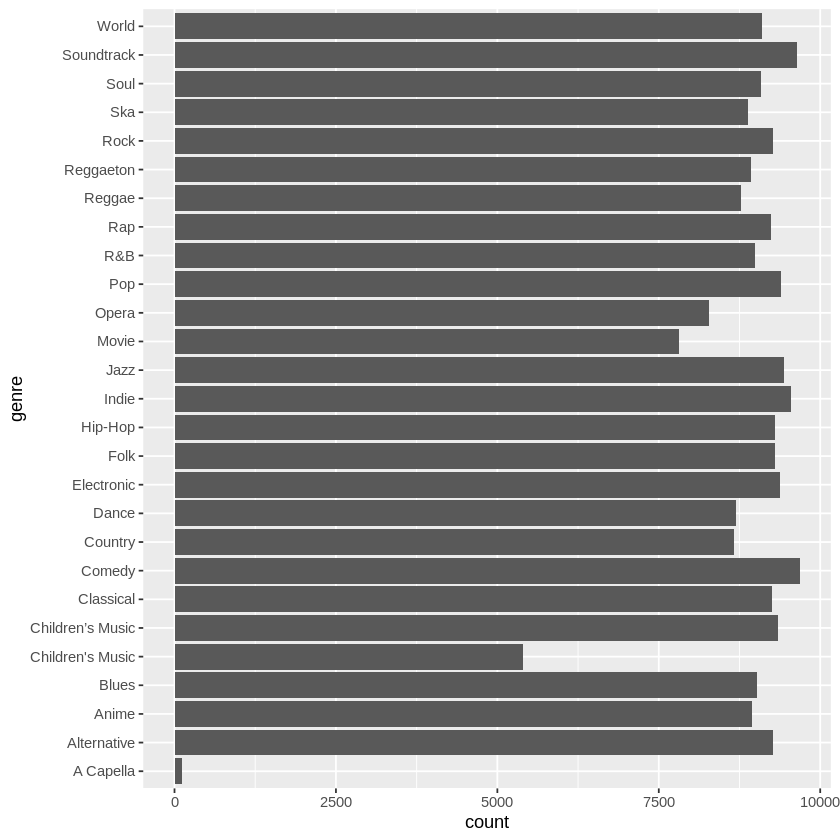

In [36]:
genre_plot <- song_data |>
    ggplot(aes(genre))+
        geom_bar()+
        coord_flip()

genre_plot

Very few A Capella: should we still include this genre?
Also need to check for songs that are placed in multiple genres...

Intro stuff: motivations, description of dataset + predictors etc.